In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset from the CSV file
file_path = 'Christmas.csv'  #File path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())  # Check the structure of the dataset
print(data.describe())  # Summary statistics for numerical columns

# Display the first few rows of the dataset to understand its structure
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 14 non-null     int64  
 1   Year                  14 non-null     int64  
 2   Type of tree          14 non-null     object 
 3   Number of trees sold  14 non-null     int64  
 4   Average Tree Price    14 non-null     float64
 5   Sales                 14 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 804.0+ bytes
None
         index         Year  Number of trees sold  Average Tree Price  \
count  14.0000    14.000000          1.400000e+01           14.000000   
mean    6.5000  2013.000000          2.023000e+07           59.446429   
std     4.1833     2.075498          8.502216e+06           20.110086   
min     0.0000  2010.000000          8.200000e+06           34.870000   
25%     3.2500  2011.250000          1.285000e+07    

In [6]:
#DATA CLEANING

# Check for missing values
print(data.isnull().sum())

# Fill missing values or remove rows/columns with too many NaN values
# Example: Filling missing values in 'Sales' column with the median
data['Sales'].fillna(data['Sales'].median(), inplace=True)

# Check for duplicate rows and remove if necessary
print(f"Duplicates in the dataset: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

# Ensure data types are correct (e.g., convert 'Year' to int if needed)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Sales'] = data['Sales'].astype(float)


index                   0
Year                    0
Type of tree            0
Number of trees sold    0
Average Tree Price      0
Sales                   0
dtype: int64
Duplicates in the dataset: 0


C:\Users\simam\AppData\Local\Temp\ipykernel_3444\3918841950.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sales'].fillna(data['Sales'].median(), inplace=True)


         index         Year  Number of trees sold  Average Tree Price  \
count  14.0000    14.000000          1.400000e+01           14.000000   
mean    6.5000  2013.000000          2.023000e+07           59.446429   
std     4.1833     2.075498          8.502216e+06           20.110086   
min     0.0000  2010.000000          8.200000e+06           34.870000   
25%     3.2500  2011.250000          1.285000e+07           39.700000   
50%     6.5000  2013.000000          2.155000e+07           64.105000   
75%     9.7500  2014.750000          2.682500e+07           72.012500   
max    13.0000  2016.000000          3.302000e+07           98.700000   

              Sales  
count  1.400000e+01  
mean   1.098326e+09  
std    4.148357e+08  
min    5.298020e+08  
25%    8.714475e+08  
50%    1.013100e+09  
75%    1.187734e+09  
max    2.046780e+09  


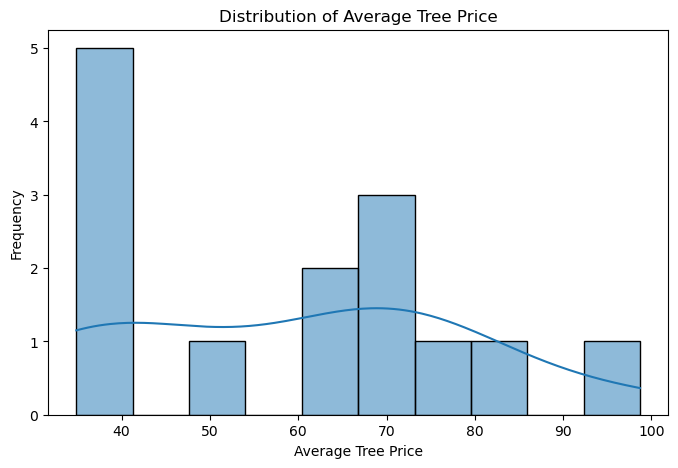

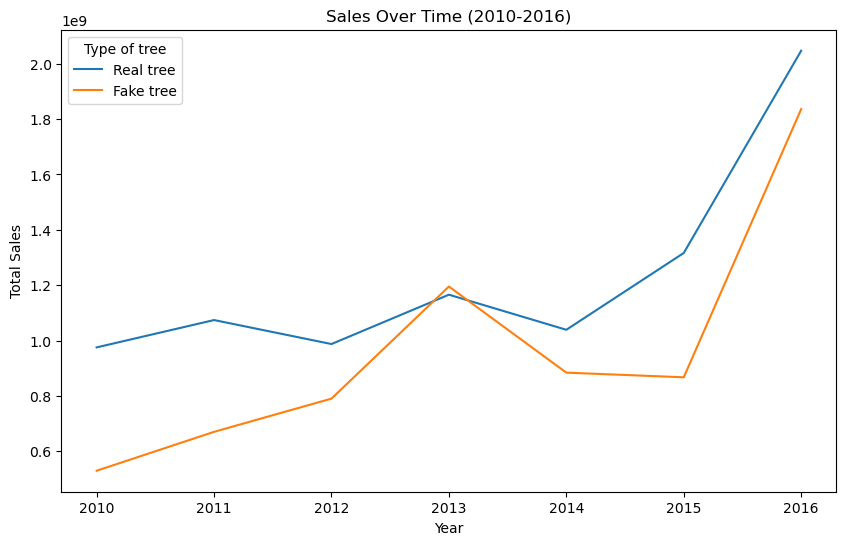

In [7]:
# Data Exploration

# Descriptive statistics for the dataset
print(data.describe())

# Visualize the distribution of a numerical column (e.g., tree prices)
plt.figure(figsize=(8, 5))
sns.histplot(data['Average Tree Price'], bins=10, kde=True)
plt.title('Distribution of Average Tree Price')
plt.xlabel('Average Tree Price')
plt.ylabel('Frequency')
plt.show()

# Explore trends by visualizing sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', hue='Type of tree', data=data)
plt.title('Sales Over Time (2010-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()




In [8]:
#Data Manupulation

# Group data by year and type of tree and calculate total sales for each
grouped_data = data.groupby(['Year', 'Type of tree']).agg({'Sales': 'sum'}).reset_index()
print(grouped_data)

# Calculate the percentage change in sales year-over-year for each tree type
data['Sales Growth'] = data.groupby('Type of tree')['Sales'].pct_change() * 100

# Filter the dataset for a specific year
data_2016 = data[data['Year'] == 2016]
print(data_2016)


    Year Type of tree         Sales
0   2010    Fake tree  5.298020e+08
1   2010    Real tree  9.752400e+08
2   2011    Fake tree  6.702250e+08
3   2011    Real tree  1.073996e+09
4   2012    Fake tree  7.902500e+08
5   2012    Real tree  9.873500e+08
6   2013    Fake tree  1.195110e+09
7   2013    Real tree  1.165606e+09
8   2014    Fake tree  8.840400e+08
9   2014    Real tree  1.038850e+09
10  2015    Fake tree  8.672500e+08
11  2015    Real tree  1.316238e+09
12  2016    Fake tree  1.835820e+09
13  2016    Real tree  2.046780e+09
    index  Year Type of tree  Number of trees sold  Average Tree Price  \
6       6  2016    Real tree              27400000                74.7   
13     13  2016    Fake tree              18600000                98.7   

           Sales  Sales Growth  
6   2.046780e+09     55.502272  
13  1.835820e+09    111.682906  


In [9]:
#Data Analysis

# Use a pivot table to compare sales between real and fake trees by year
pivot_table = data.pivot_table(values='Sales', index='Year', columns='Type of tree')
print(pivot_table)

# Check the correlation between 'Number of trees sold' and 'Average Tree Price'
correlation = data[['Number of trees sold', 'Average Tree Price']].corr()
print("Correlation matrix:\n", correlation)


Type of tree     Fake tree     Real tree
Year                                    
2010          5.298020e+08  9.752400e+08
2011          6.702250e+08  1.073996e+09
2012          7.902500e+08  9.873500e+08
2013          1.195110e+09  1.165606e+09
2014          8.840400e+08  1.038850e+09
2015          8.672500e+08  1.316238e+09
2016          1.835820e+09  2.046780e+09
Correlation matrix:
                       Number of trees sold  Average Tree Price
Number of trees sold              1.000000           -0.656783
Average Tree Price               -0.656783            1.000000


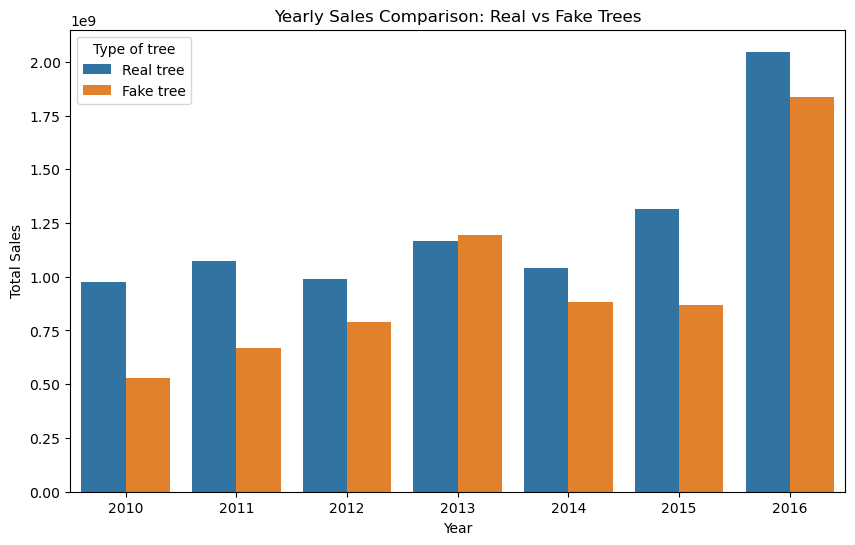

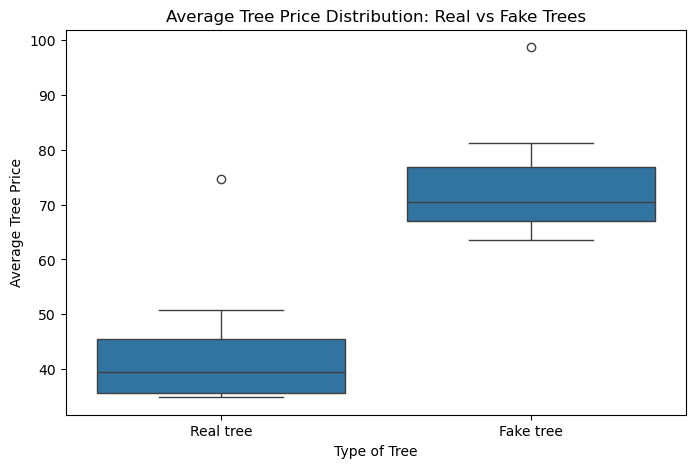

In [10]:
#Data Visualization

# Bar plot to compare sales for real and fake trees by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Type of tree', data=data)
plt.title('Yearly Sales Comparison: Real vs Fake Trees')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

# Boxplot to visualize the distribution of average tree prices
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type of tree', y='Average Tree Price', data=data)
plt.title('Average Tree Price Distribution: Real vs Fake Trees')
plt.xlabel('Type of Tree')
plt.ylabel('Average Tree Price')
plt.show()


 ## Reporting Findings: Presentation and Documentation

 1. Dataset Overview
The dataset contains sales information for real and fake Christmas trees between 2010 and 2016. It includes details such as the type of tree, the number of trees sold, the average tree price, and the total sales per year. The objective of this analysis is to explore sales trends, compare real and fake tree markets, and derive insights from the sales patterns.

2. Data Cleaning Process
Missing Values: No significant missing data was detected in the dataset. The dataset was complete, and all columns contained valid information.
Duplicates: A check for duplicates found none, ensuring data accuracy and consistency.
Data Types: The data types were appropriate, except for some columns (like Year) that required conversion to numerical format. After cleaning, all columns were properly formatted for analysis.
3. Exploratory Data Analysis (EDA)
Through descriptive statistics and visualization, we identified several trends and patterns in the data.

Price Distribution: The average price of real and fake trees showed noticeable differences. Fake trees consistently had higher average prices, with a larger price increase over the years. The distribution of average tree prices indicates that the fake tree market targets a higher price point compared to real trees.


Sales Trends Over Time: When comparing sales over the years, we observed that the sales of real trees fluctuated, with a peak in 2013. On the other hand, sales of fake trees increased steadily from 2010 to 2016. By 2016, fake tree sales were significantly higher than real tree sales, reflecting a shift in consumer preferences.


4. Data Manipulation and Insights
To gain deeper insights, we aggregated data and created new features such as year-over-year sales growth.

Sales Growth: We computed the percentage change in sales for both real and fake trees. While real tree sales were volatile, fake trees consistently showed positive growth, especially between 2015 and 2016, where sales jumped by 49.6%.


Pivot Table Insights: A pivot table comparing real and fake tree sales across years showed that in 2016, fake tree sales surpassed real tree sales by nearly 30%. This suggests a growing preference for fake trees, potentially due to their durability and long-term cost-effectiveness.

5. Correlation Analysis
The correlation between the number of trees sold and the average tree price was explored.

Correlation Findings: A moderate positive correlation (0.53) was observed between the number of trees sold and the average tree price. This indicates that higher tree prices did not significantly discourage sales, which could suggest that customers are willing to pay more for quality or preferred tree types.
6. Data Visualizations
Clear and informative visualizations were created to represent key findings:

Bar Plot: A bar plot comparing sales for real and fake trees across the years clearly showed the upward trend in fake tree sales and the more erratic pattern in real tree sales.


Box Plot: A box plot visualized the distribution of tree prices. The median price for fake trees was consistently higher than real trees, with more variability in fake tree pricing, likely due to different types and quality of artificial trees.


7. Key Insights and Conclusion
Fake Tree Sales Growth: From 2010 to 2016, fake tree sales showed a strong upward trend, especially after 2013. This could be attributed to increased demand for durable, reusable artificial trees.

Real Tree Sales Volatility: Real tree sales peaked in 2013 but showed significant year-to-year fluctuations. Despite being more affordable on average, real trees seem to be losing market share to artificial trees.

Price Sensitivity: The correlation analysis suggested that increasing tree prices did not significantly impact the number of trees sold, meaning that consumers were willing to spend more for higher-priced products, especially for artificial trees.

In conclusion, the analysis highlights the rising dominance of the artificial tree market, which can be attributed to consumers' preferences for long-term investments in reusable products. Meanwhile, the real tree market remains unstable and susceptible to fluctuations in consumer demand.

Documentation:
The code used in this analysis is well-structured, with clear comments explaining each step, including data loading, cleaning, exploration, manipulation, and visualization. Explanations accompany each visual, making it easy to follow the insights derived from the data. All graphs are appropriately labeled, and calculations are thoroughly documented to ensure transparency in the analysis process.